# Hipótese 1F - "Se dividirmos os produtos em categorias, cada uma delas apresentará um comportamento sazonal próprio de quantidade de compras de produtos"


## Importação de bibliotecas

In [1]:
from scipy import stats
import scipy
import scipy.fftpack

import datetime
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## Leitura dos dados

In [2]:
sold_products = pd.read_csv("../datasets/trusted/sold_products.csv", index_col=0)
sold_products.count()

product_id                       104881
order_id                         104881
price                            104881
freight_value                    104881
order_purchase_timestamp         104881
order_estimated_delivery_date    104881
order_delivered_carrier_date     104881
order_delivered_customer_date    104881
product_category_name            104881
product_name_lenght              104881
product_description_lenght       104881
product_photos_qty               104881
product_weight_g                 104881
product_length_cm                104881
product_height_cm                104881
product_width_cm                 104881
dtype: int64

In [24]:
timestamps = pd.to_datetime(sold_products['order_purchase_timestamp'])

products = pd.DataFrame({
    'id': sold_products['product_id'],
    'category': sold_products['product_category_name'],
    'price': sold_products['price'],
    'freight_value': sold_products['freight_value'],
    'time': pd.to_numeric(timestamps),
    'year': timestamps.dt.year,
    'month': timestamps.dt.month,
    'day': timestamps.dt.day
})

In [25]:
categories = products['category'].unique()

print(''.join(map(lambda c: c.ljust(60), categories)))

cool_stuff                                                  pet_shop                                                    moveis_decoracao                                            perfumaria                                                  ferramentas_jardim                                          utilidades_domesticas                                       telefonia                                                   beleza_saude                                                livros_tecnicos                                             fashion_bolsas_e_acessorios                                 cama_mesa_banho                                             esporte_lazer                                               consoles_games                                              moveis_escritorio                                           malas_acessorios                                            alimentos                                                   agro_industria_e_comercio               

<BarContainer object of 72 artists>

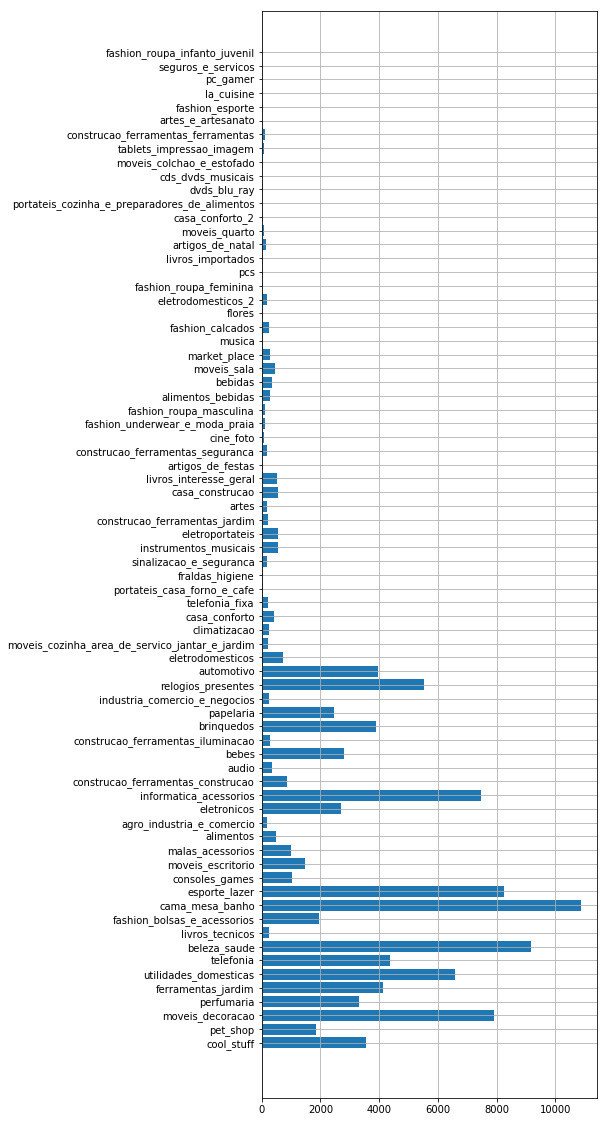

In [26]:
i_cat = products['category'].map(lambda p: np.where(categories == p)[0].item(0))
h, b = np.histogram(i_cat, bins=range(len(categories)))

plt.figure(figsize=(6, 20))
plt.grid(True)
plt.yticks(b, categories)
plt.barh(b[:72], h)

In [33]:
products_by_category = products.groupby([
    'category', 'year', 'month', 'day', 'time'
]).agg(['count'])['id']['count'].reset_index()

products_by_category.head()

,category,year,month,day,time,count
0,agro_industria_e_comercio,2017,1,23,1485154984000000000,2
1,agro_industria_e_comercio,2017,1,31,1485883989000000000,1
2,agro_industria_e_comercio,2017,2,5,1486323310000000000,1
3,agro_industria_e_comercio,2017,2,8,1486521156000000000,1
4,agro_industria_e_comercio,2017,2,12,1486932146000000000,1


## Método

A metodologia seguida será similar à usada para a [Hipótese 1A](Hip%C3%B3tese%201A%20-%20Sazonalidade%20dos%20pedidos.ipynb), mas ao invés de analisar a quantidade de vendas no geral, será feita uma divisão em categorias de produtos.

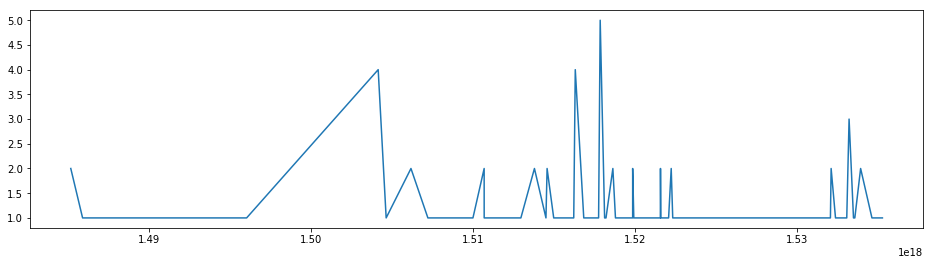

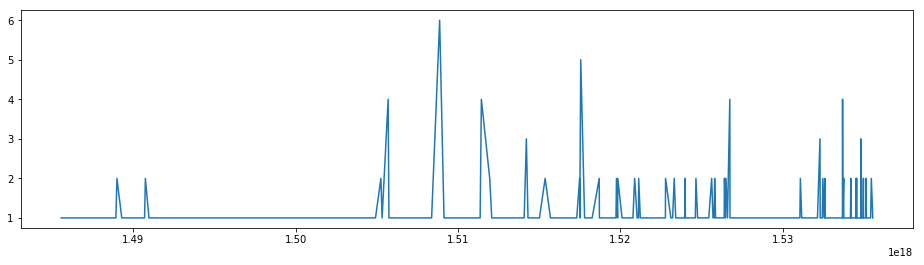

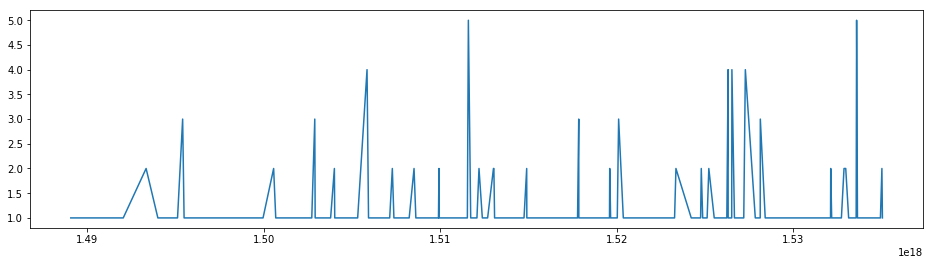

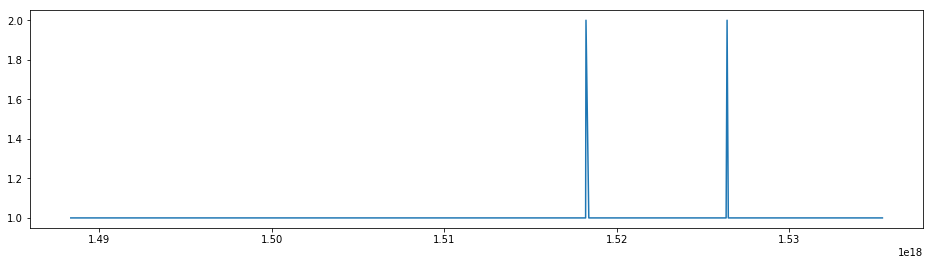

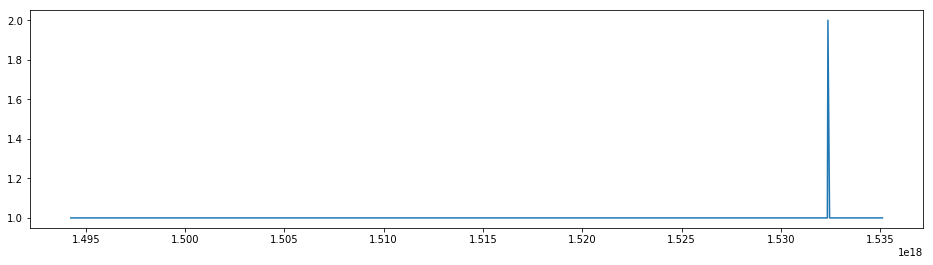

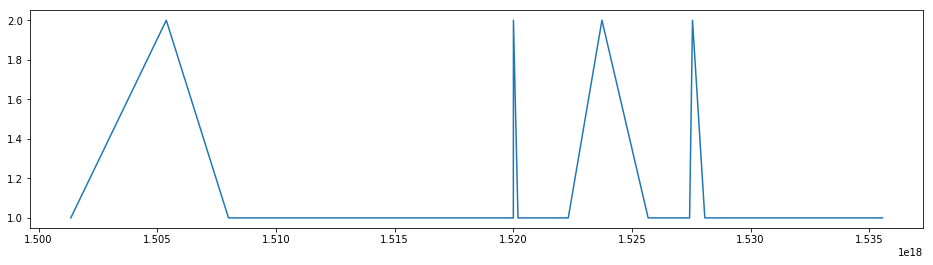

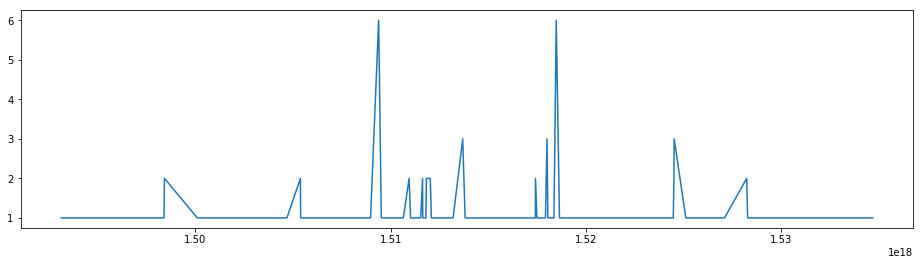

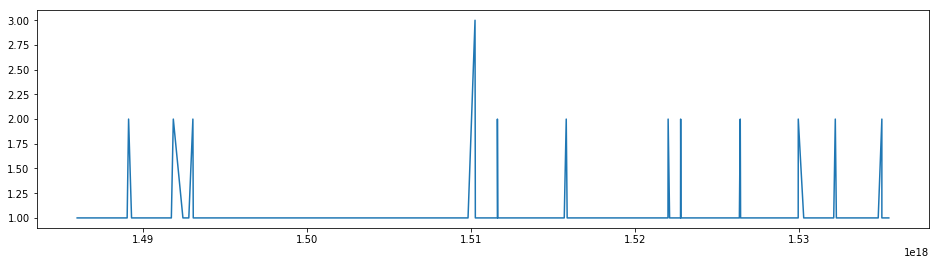

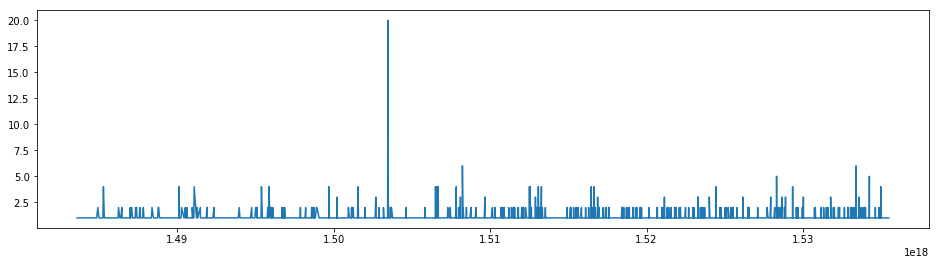

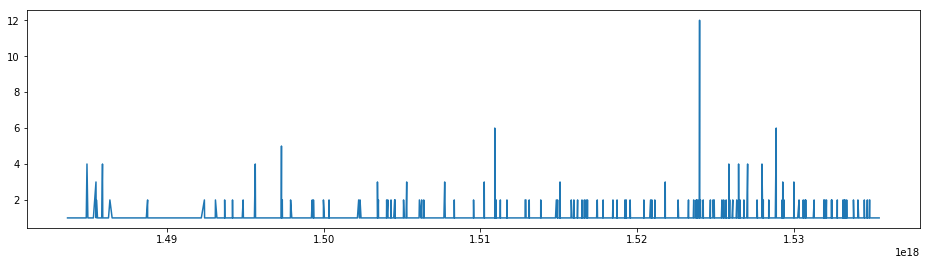

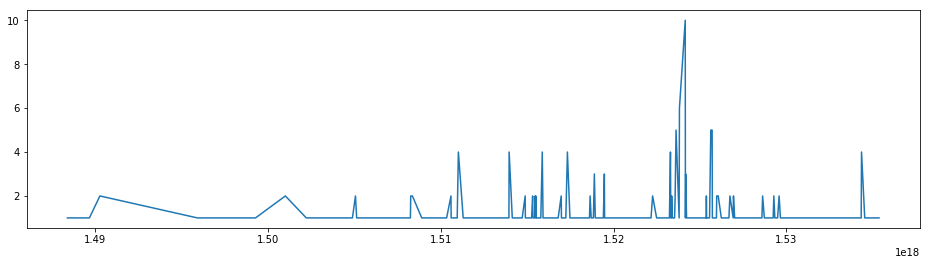

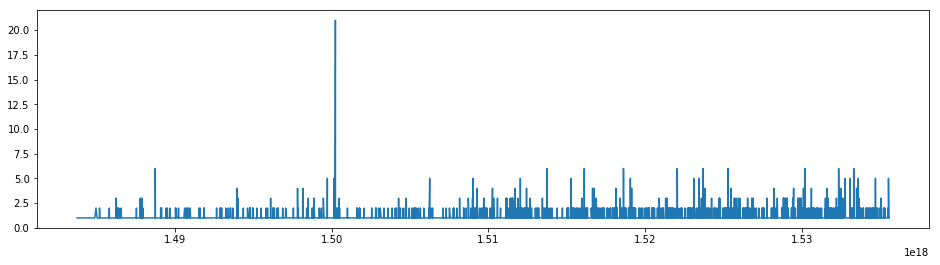

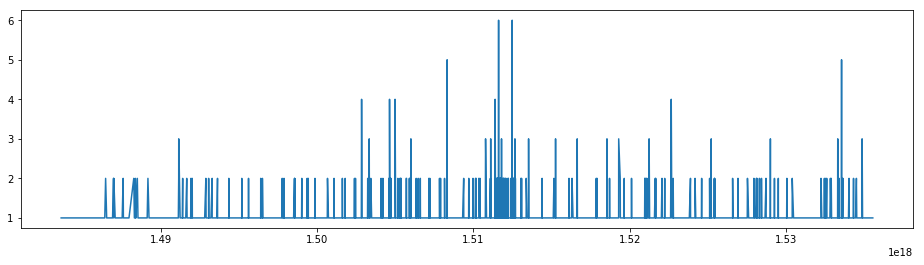

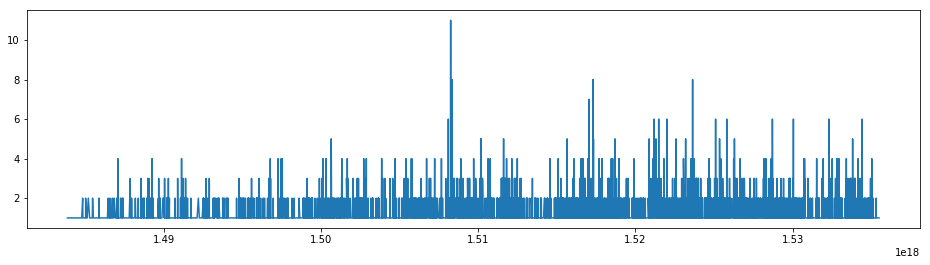

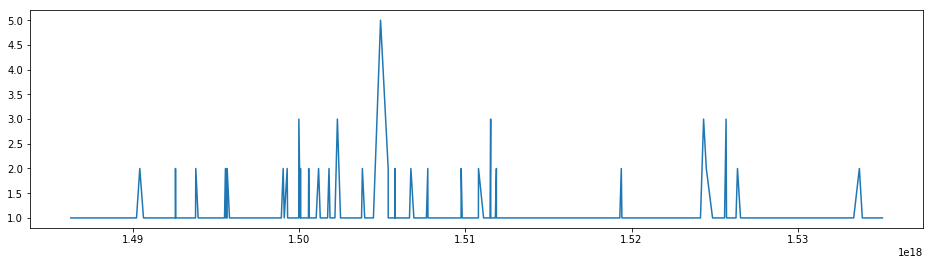

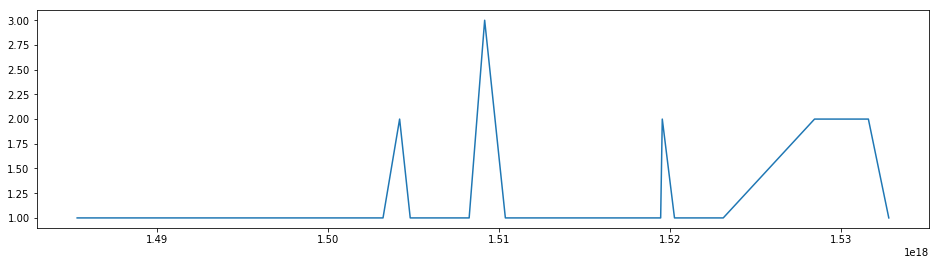

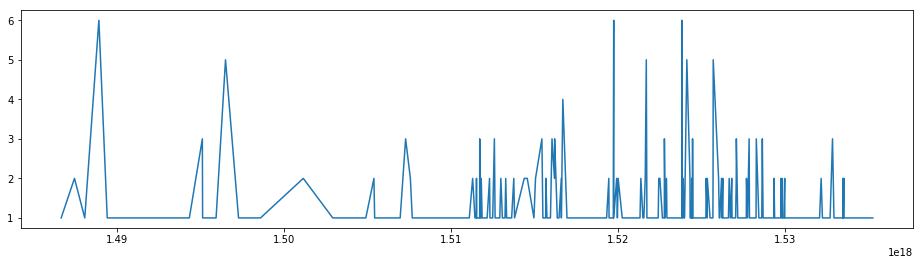

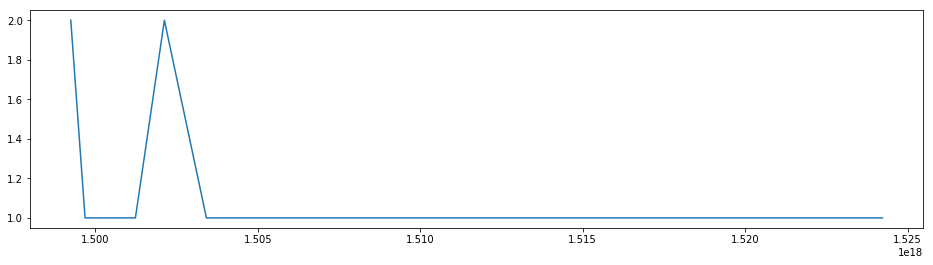

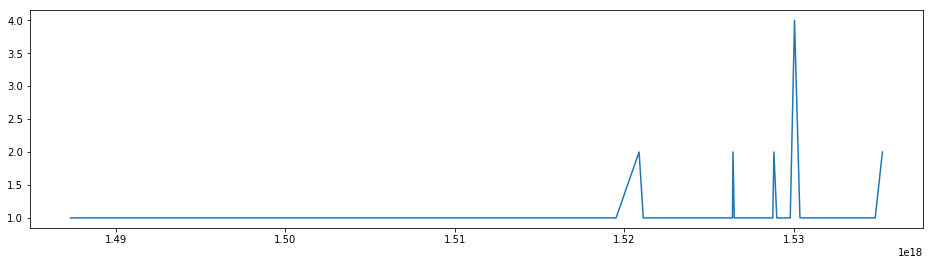

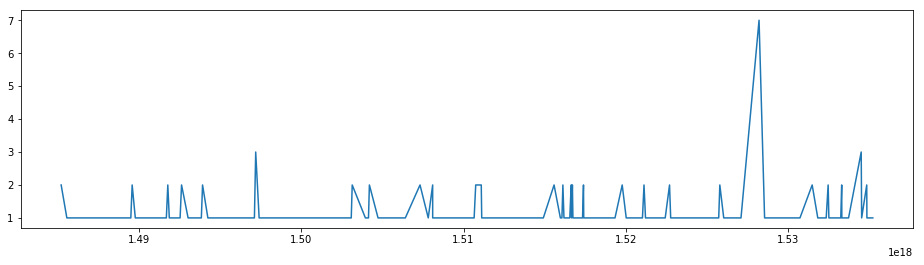

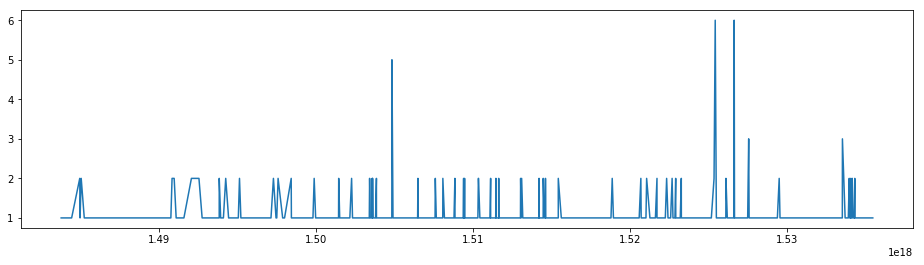

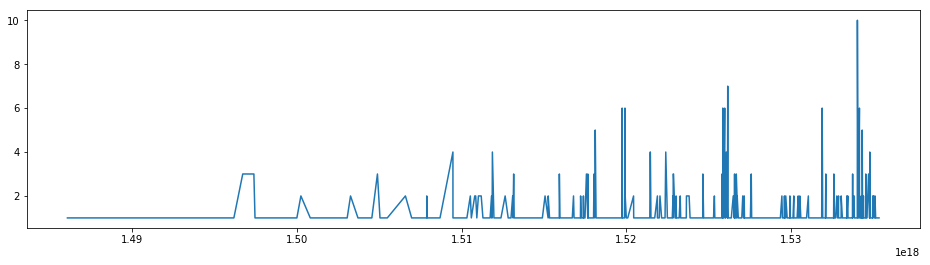

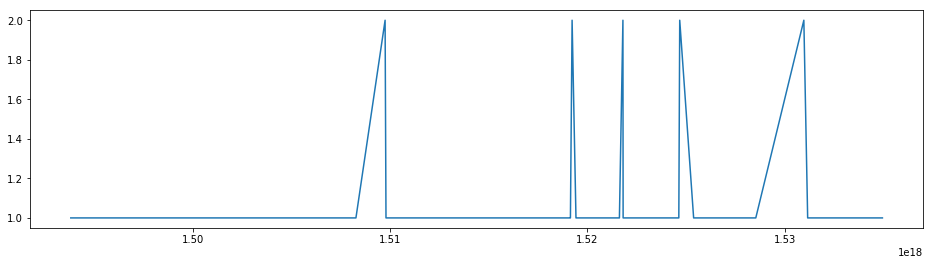

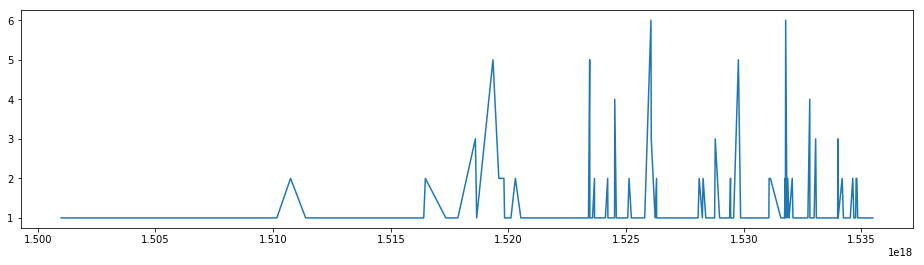

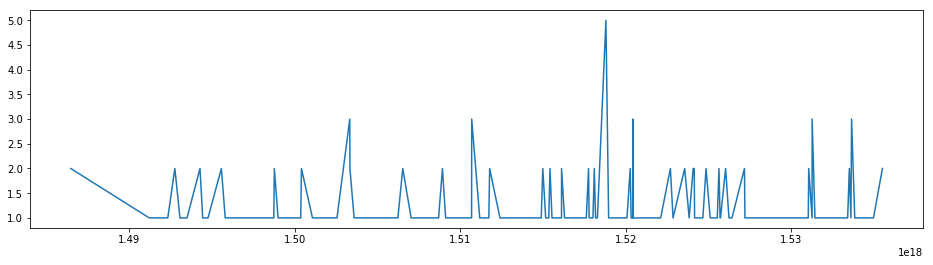

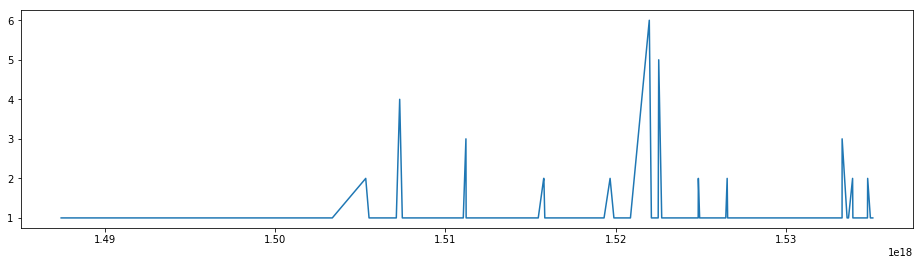

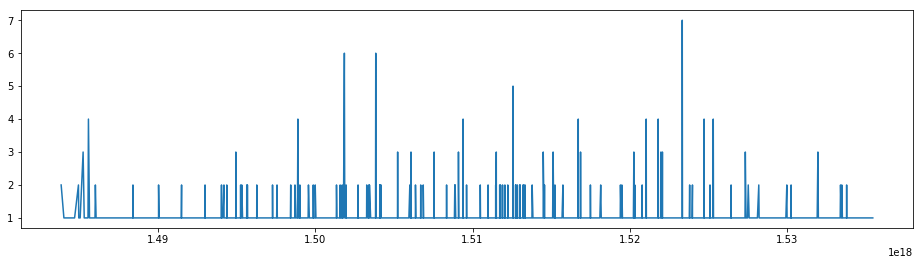

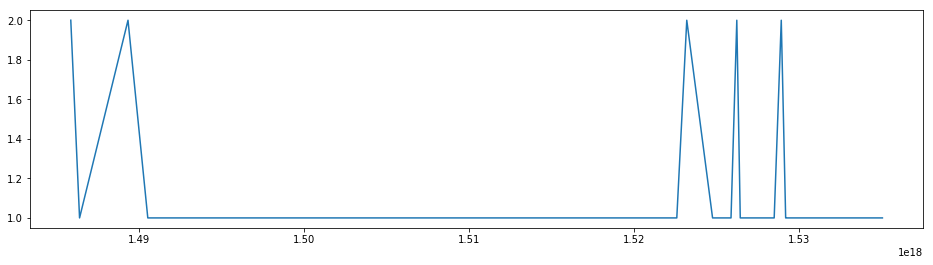

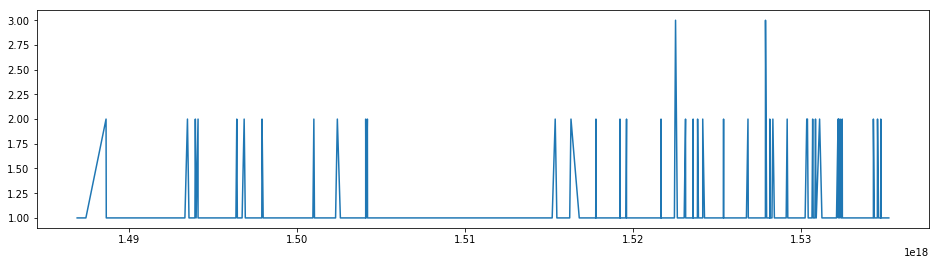

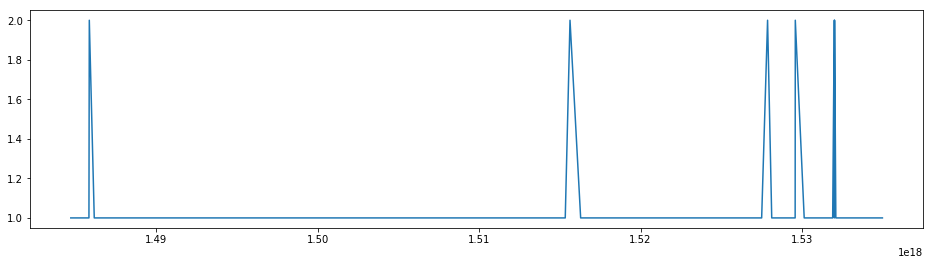

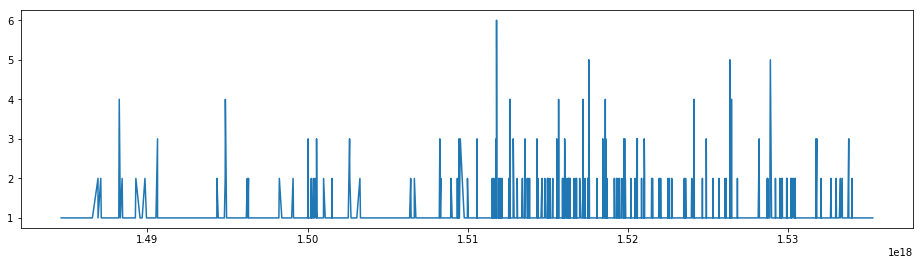

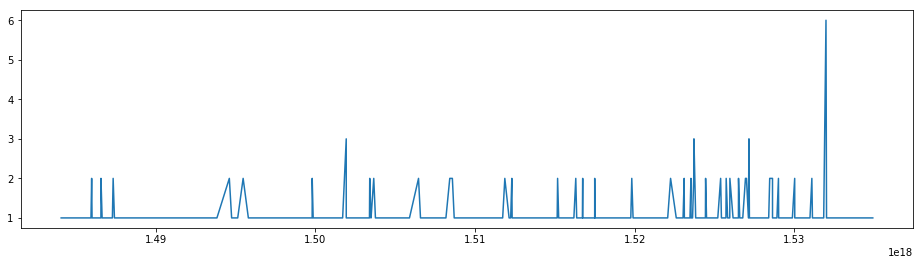

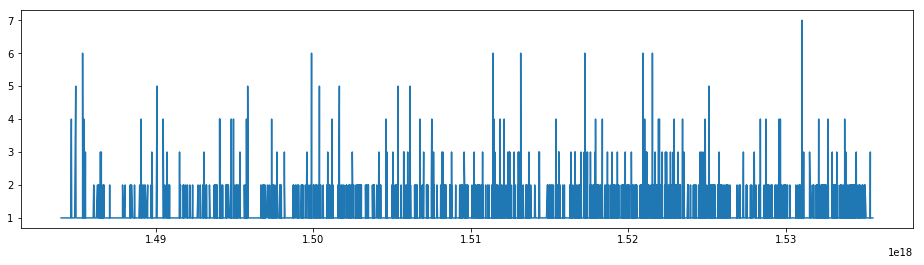

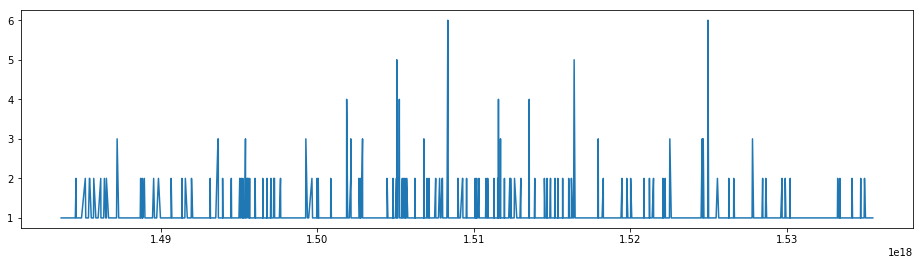

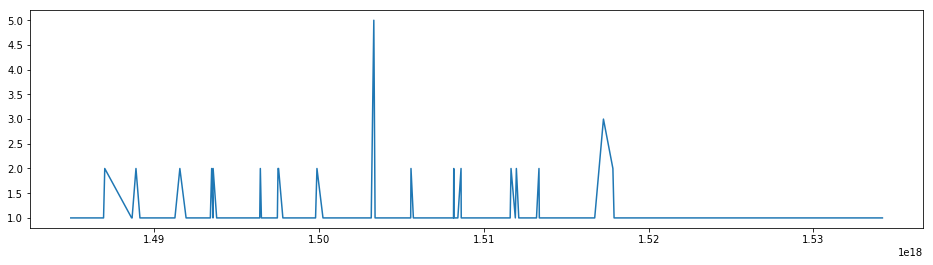

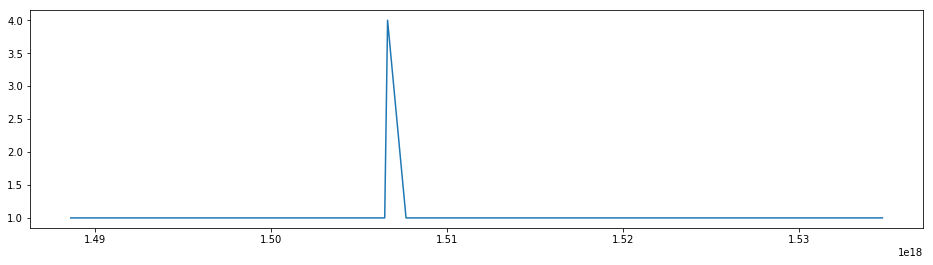

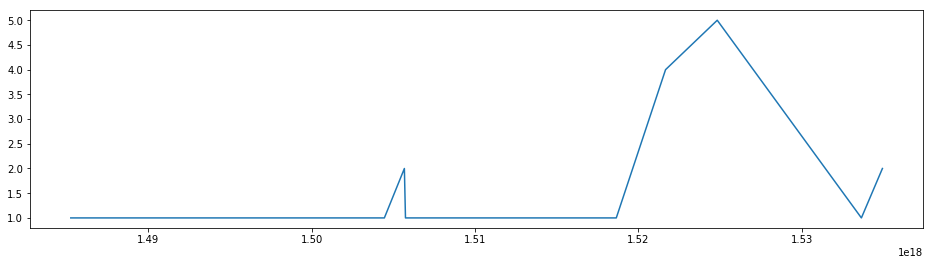

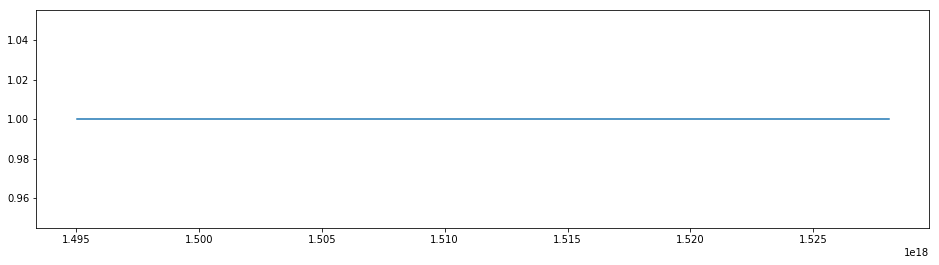

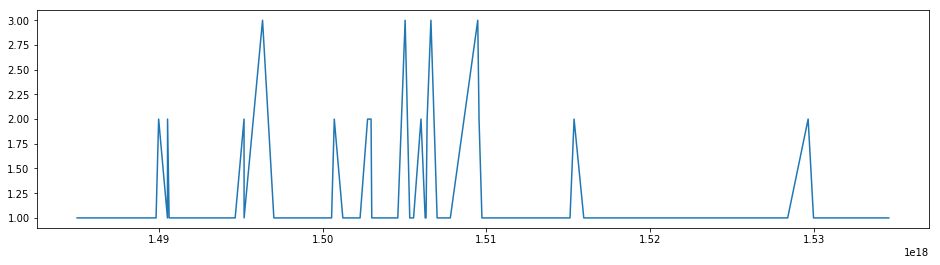

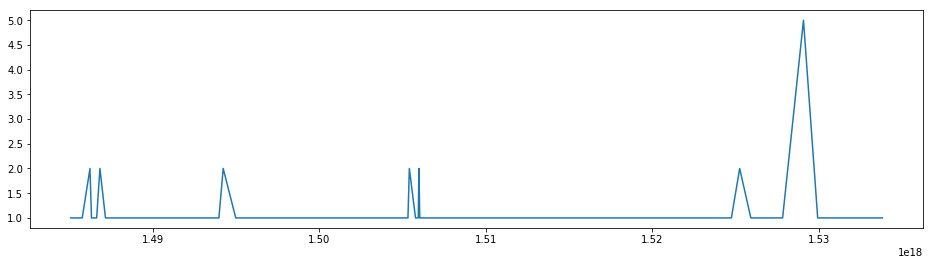

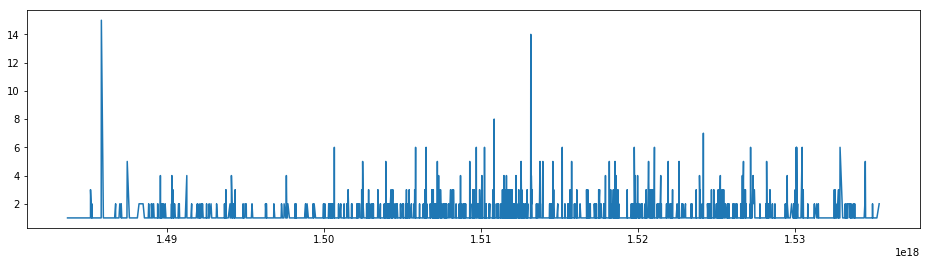

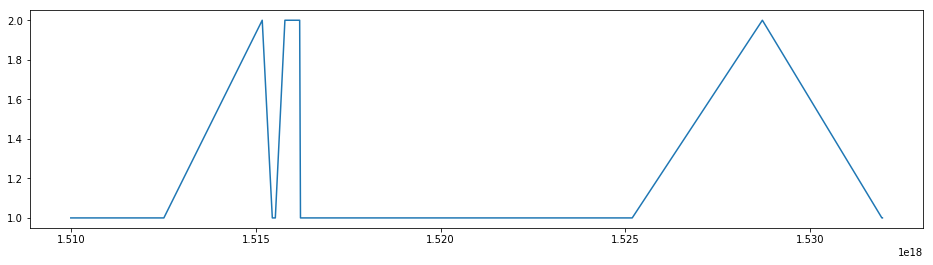

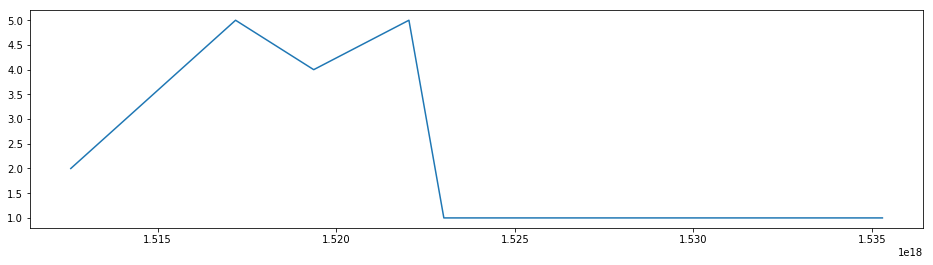

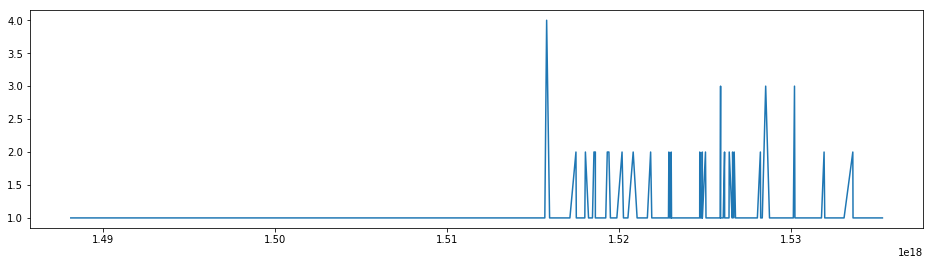

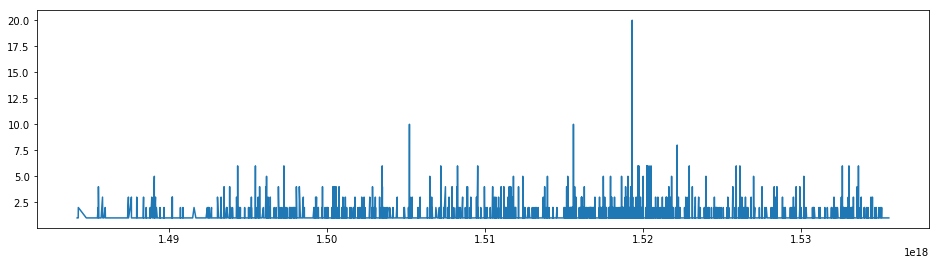

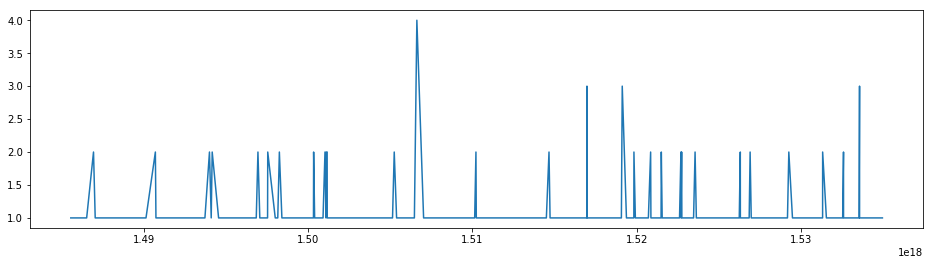

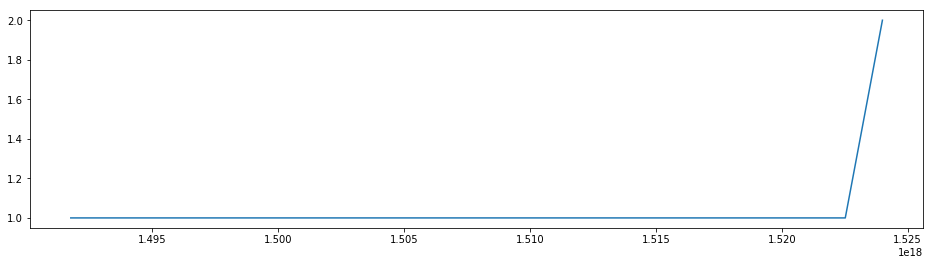

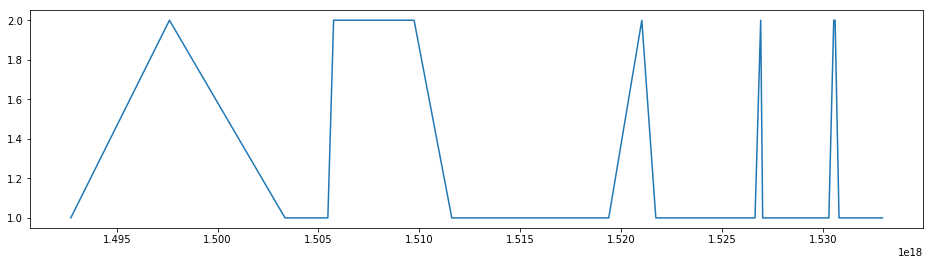

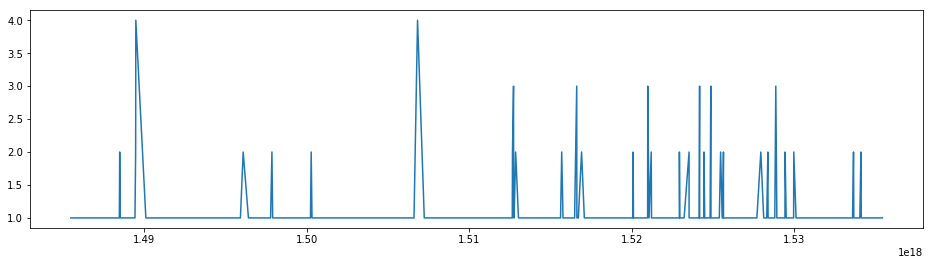

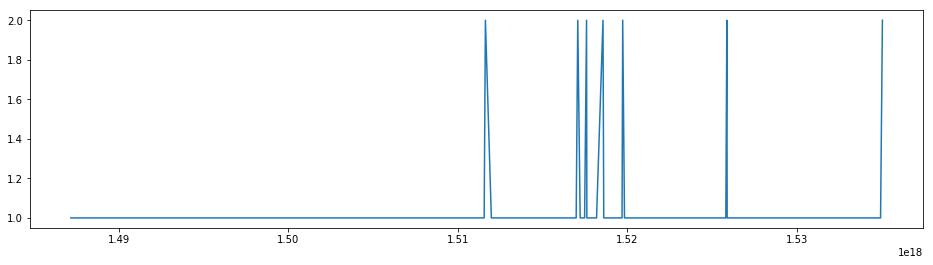

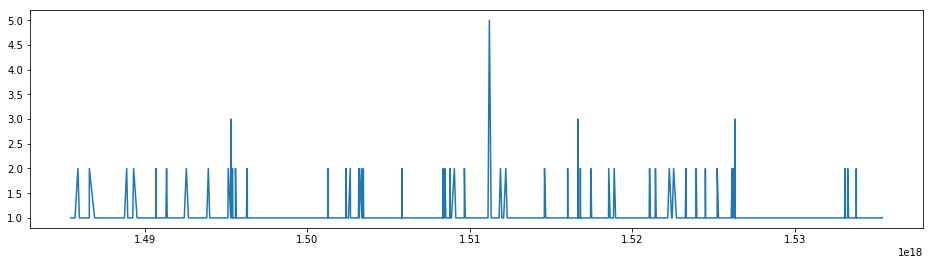

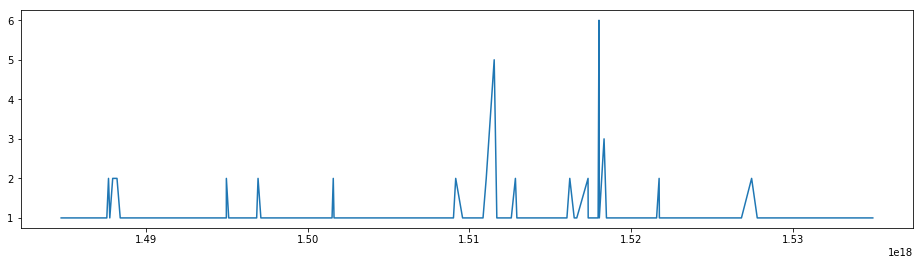

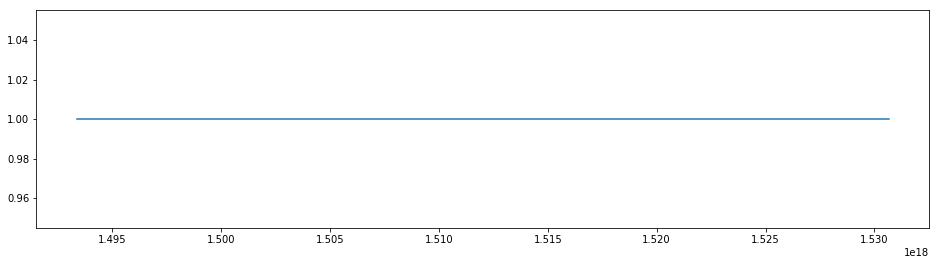

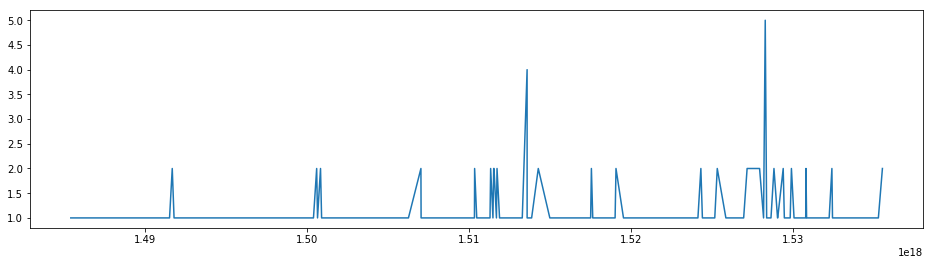

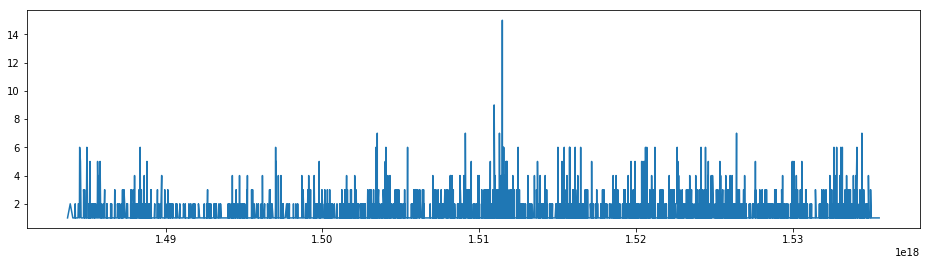

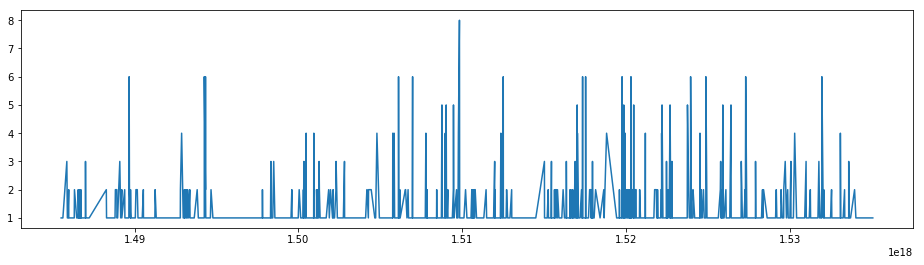

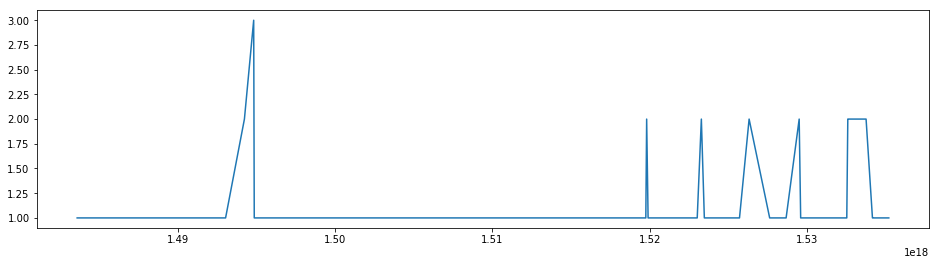

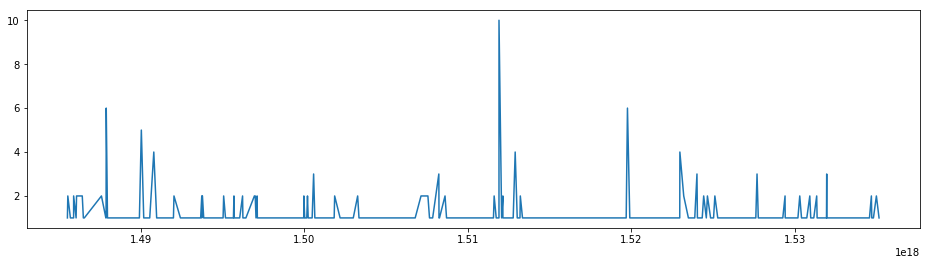

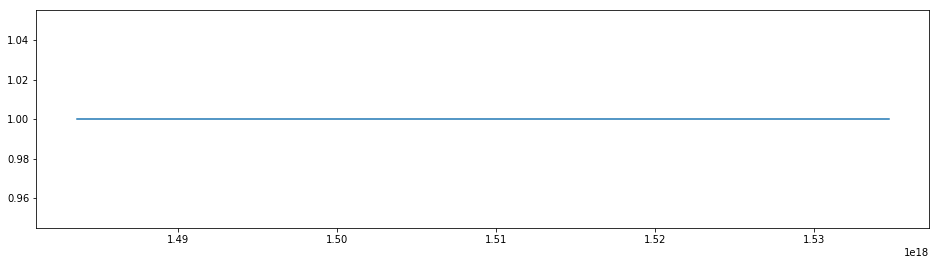

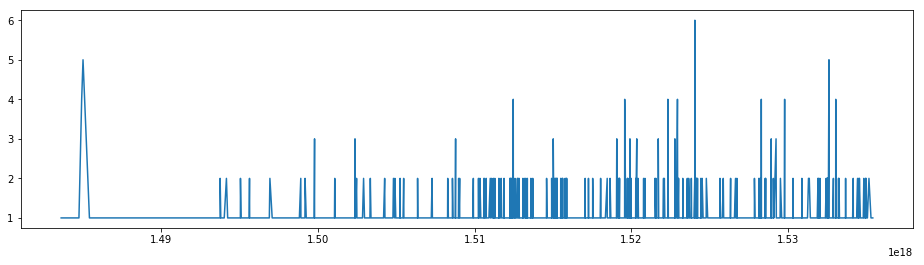

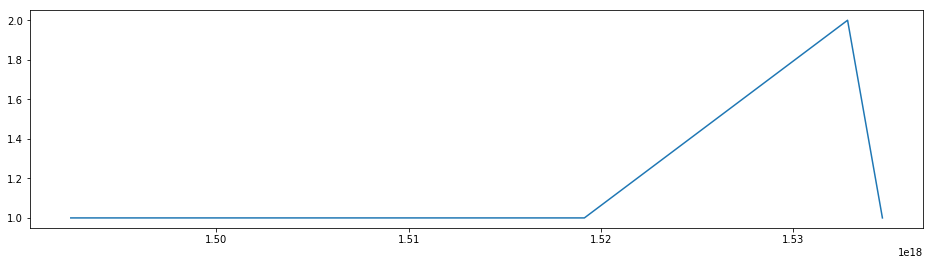

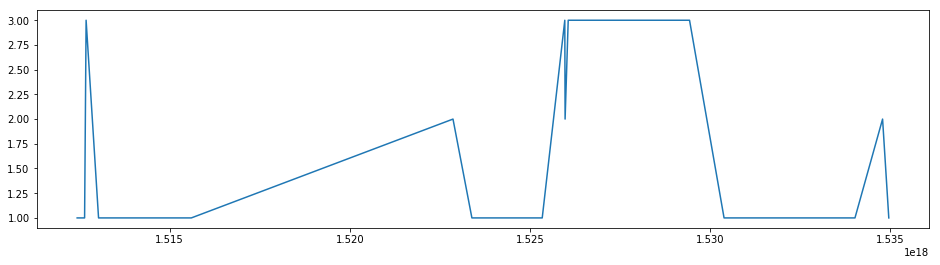

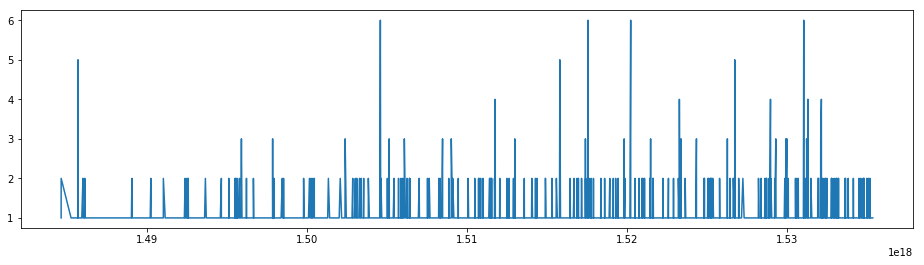

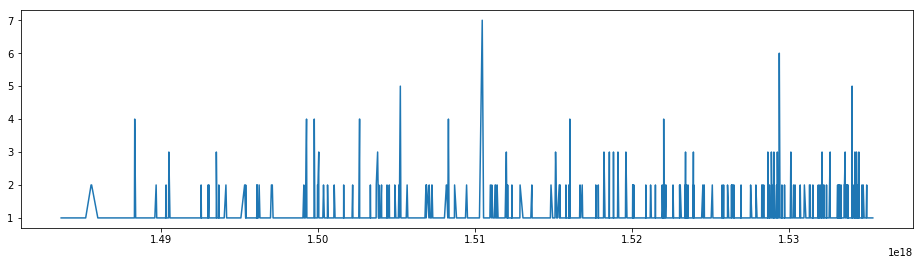

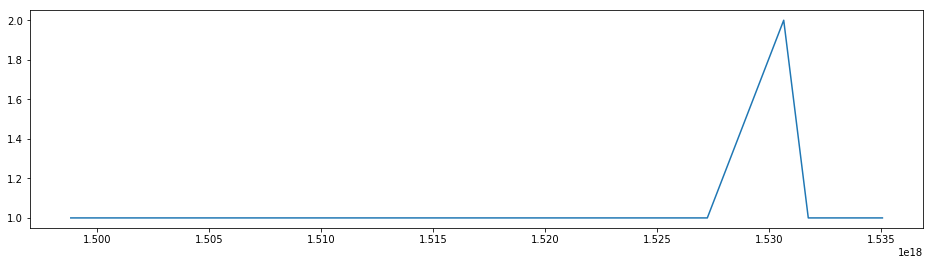

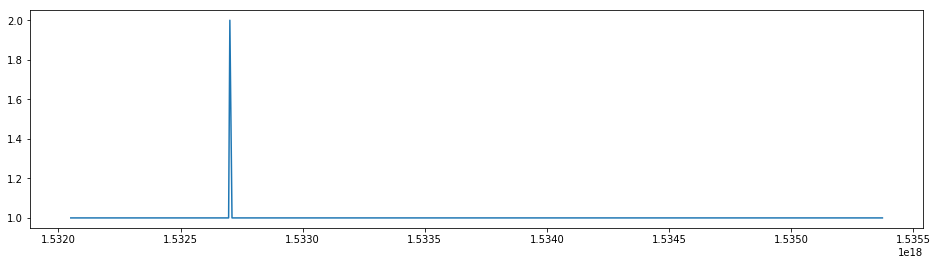

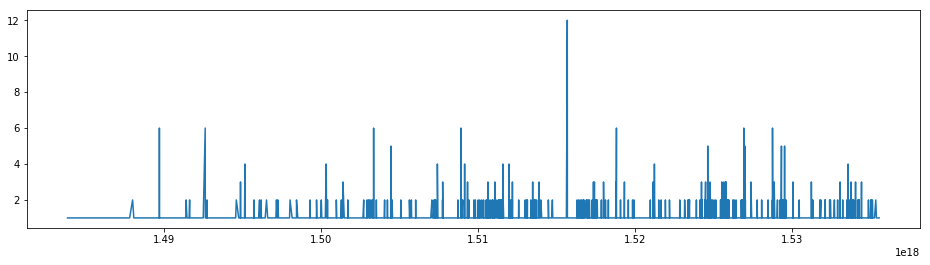

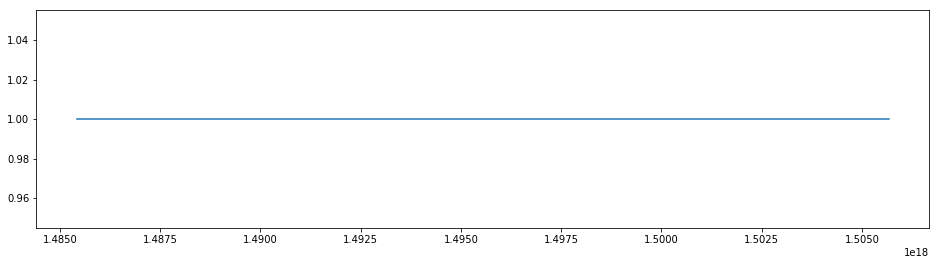

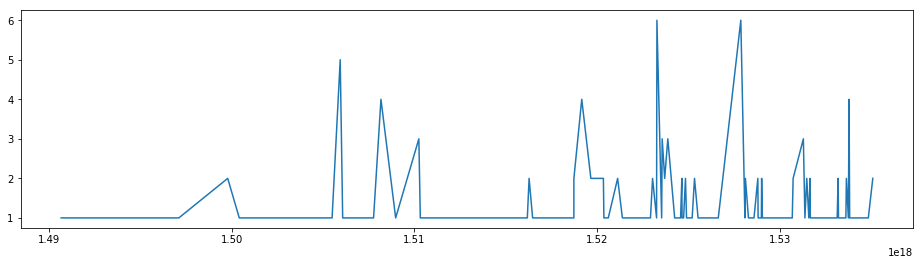

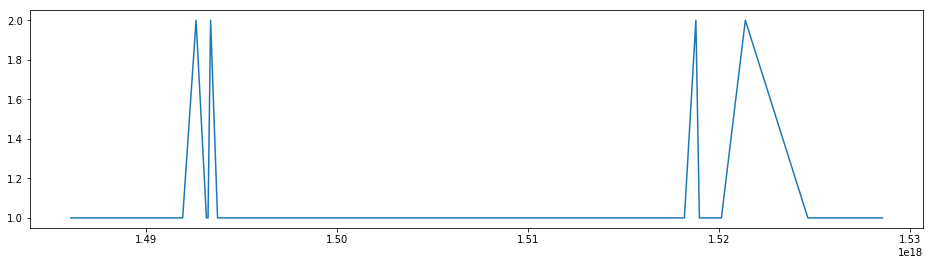

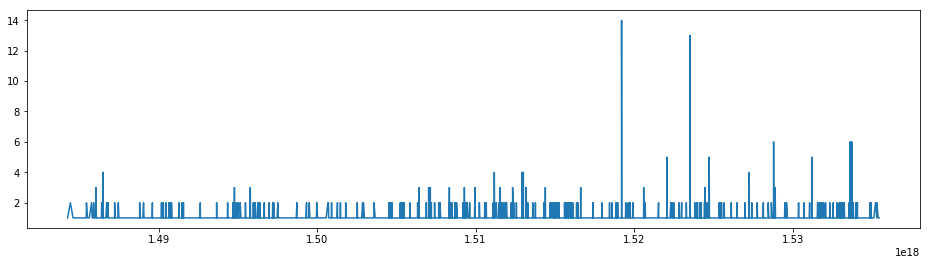

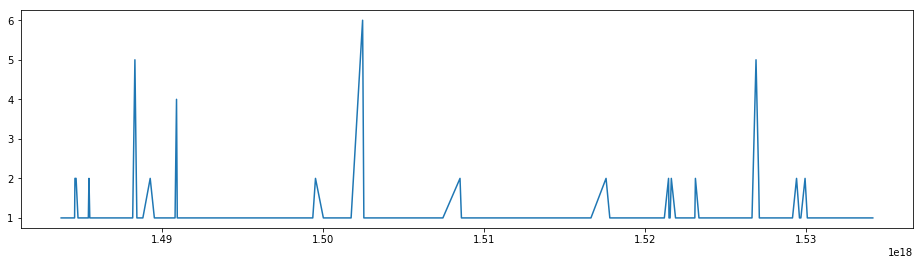

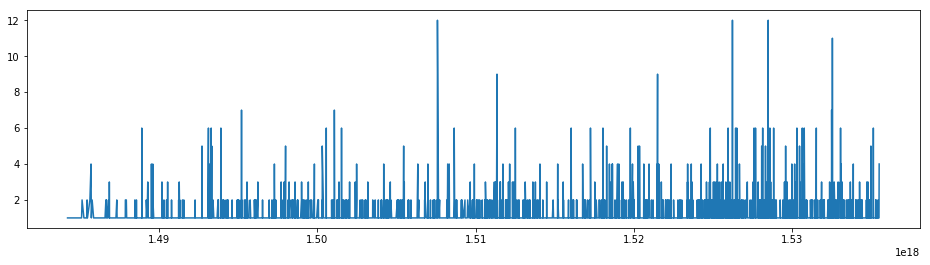

In [45]:
sales_by_category = products_by_category.groupby(['category']).groups

for category, indexes in sales_by_category.items():
    plt.figure(figsize=(16, 4))
    plt.plot(products_by_category['time'].values[indexes], products_by_category['count'].values[indexes])
    plt.show()